## US Accidents Exploratory Data Analysis
- NOTE! Does not contain Data for Newyork
------------------------------------------------------------
                                                                                                         Utkarsh Shrivastava

### Importing Usueful Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Data Prepration And Cleaning
- Load the file using pandas
- summary
- fix misising incorrect values and 

In [2]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [3]:
df.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

### Ask and Answer Question
- Are their More accidents on warmer or colder regin
- which  5 states have the higher number of accidents ? How about Per / capita
- does new york show in data ? why count is lower in that
- Among the top 100 cities in the aciident which states they belong to most frequently?
--------------------------------------------------------------------
- How their are too many accidents on fair weather?
- in cloudy weather most of the accidents takes place
- What is the Visiblity ?
------------------------------------------- -------------------------
- What time the accidents are frequent  DONE
- which days/months/ years have most accidents?
- trends of accidents
- How safe is your state?
- WHen is accidents per unit of traffic is highest
- IS the distribution of accidents by hours are same on weekend as weekdays?
--------------------------------------------------------------------------
 - Amenity, Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop: these Columns Role
----------------------------------------------------------------------------

In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
# for Numerical data
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [8]:
#to find missing value in pandas
df.isna()   # give true for null and falst if not null

ID  Severity  Start_Time  End_Time  Start_Lat  Start_Lng  End_Lat  \
0        False     False       False     False      False      False    False   
1        False     False       False     False      False      False    False   
2        False     False       False     False      False      False    False   
3        False     False       False     False      False      False    False   
4        False     False       False     False      False      False    False   
...        ...       ...         ...       ...        ...        ...      ...   
2845337  False     False       False     False      False      False    False   
2845338  False     False       False     False      False      False    False   
2845339  False     False       False     False      False      False    False   
2845340  False     False       False     False      False      False    False   
2845341  False     False       False     False      False      False    False   

         End_Lng  Distance(mi)  Description  ...  Roundabout  Station   Stop  \
0          False         False        False  ...       False    False  False   
1          False         False        False  ...       False    False  False   
2          False         False        False  ...       False    False  False   
3          False         False        False  ...       False    False  False   
4          False         False        False  ...       False    False  False   
...          ...           ...          ...  ...         ...      ...    ...   
2845337    False         False        False  ...       False    False  False   
2845338    False         False        False  ...       False    False  False   
2845339    False         False        False  ...       False    False  False   
2845340    False         False        False  ...       False    False  False   
2845341    False         False        False  ...       False    False  False   

         Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
0                  False           False         False           False   
1                  False           False         False           False   
2                  False           False         False           False   
3                  False           False         False           False   
4                  False           False         False           False   
...                  ...             ...           ...             ...   
2845337            False           False         False           False   
2845338            False           False         False           False   
2845339            False           False         False           False   
2845340            False           False         False           False   
2845341            False           False         False           False   

         Civil_Twilight  Nautical_Twilight  Astronomical_Twilight  
0                 False              False                  False  
1                 False              False                  False  
2                 False              False                  False  
3                 False              False                  False  
4                 False              False                  False  
...                 ...                ...                    ...  
2845337           False              False                  False  
2845338           False              False                  False  
2845339           False              False                  False  
2845340           False              False                  False  
2845341           False              False                  False  

[2845342 rows x 47 columns]

In [9]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

#### percentage of missing values per column

In [10]:
#df.isna().sum().sort_values(ascending=False)
missing_percentages = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [11]:
type(missing_percentages)
refined_missing = missing_percentages[missing_percentages!=0]

<AxesSubplot:>

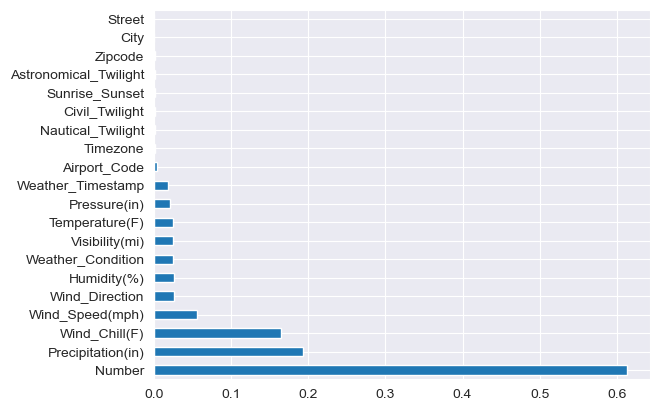

In [12]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

In [13]:
##use dataframe.drop()   df.drop(columns=['Unnamed: 0'])   to remove unwanted columns
# Remove columns dont want to use

## Exploratory Analysis and Visulization

- Columns we'll analysis
 - City
 - Sart Time
 - Start Lat, Start Long
 - Temprature
 - Weather Condition

In [14]:
cities = df.City.unique()
len(cities)
cities[:100]

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Cleveland', 'Lima', 'Westerville', 'Jamestown', 'Freeport',
       'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell', 'Edinburgh',
       'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', 'Anderson', 

In [15]:
cities_by_accident= df.City.value_counts()
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [16]:
'New York' in df.City ## Does not have data for Newyork

False

In [17]:
len(df.State.unique()) ## total 50 states are their new york is not presents here

49

<AxesSubplot:>

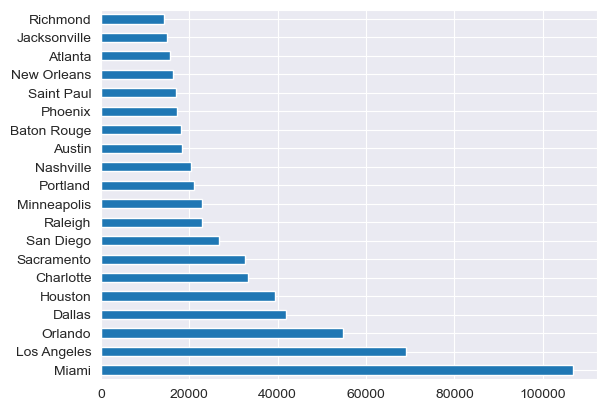

In [18]:
cities_by_accident[:20].plot(kind='barh')

C:\Users\sutka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

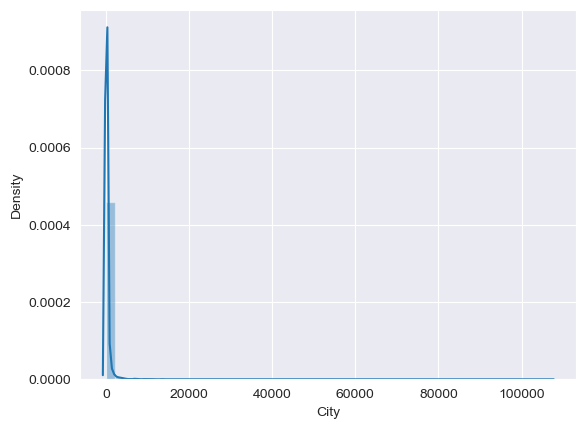

In [19]:
sns.distplot(cities_by_accident)

In [20]:
high_accident_cities = cities_by_accident[cities_by_accident>=1000]
low_accident_cities = cities_by_accident[cities_by_accident<1000]

In [21]:
len(high_accident_cities) / len(cities) *100


4.245848313644924

C:\Users\sutka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

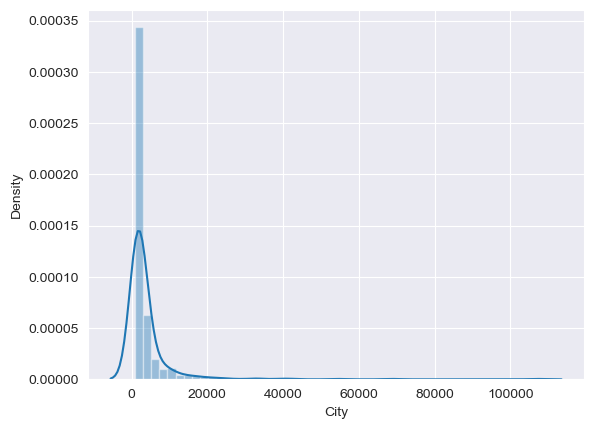

In [22]:
sns.distplot(high_accident_cities)

C:\Users\sutka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

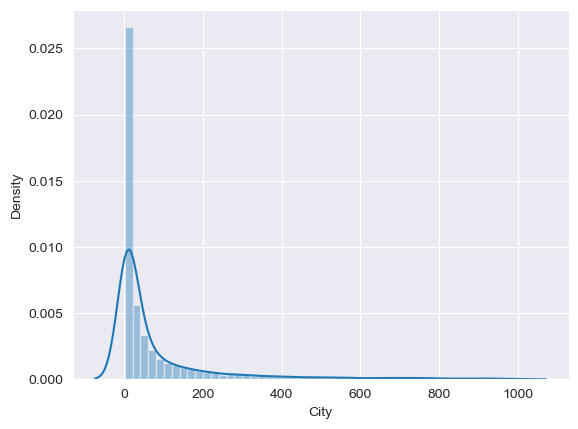

In [23]:
sns.distplot(low_accident_cities)   ## Folowing some sort of exponantial distribution


In [24]:
len(low_accident_cities)/len(cities)*100

95.74559150830338

<AxesSubplot:xlabel='City', ylabel='Count'>

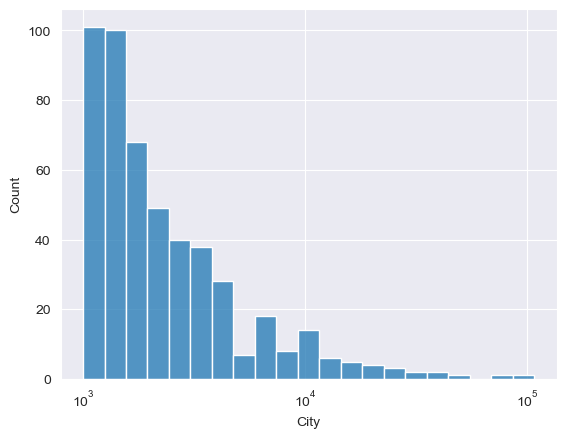

In [25]:
## Wo can go with log Scale 
sns.histplot(high_accident_cities , log_scale=True)

In [26]:
cities_by_accident[cities_by_accident==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

### Another Columns
- weather

In [27]:
df.Weather_Condition

0             Light Rain
1             Light Rain
2               Overcast
3               Overcast
4             Light Rain
               ...      
2845337             Fair
2845338             Fair
2845339    Partly Cloudy
2845340             Fair
2845341             Fair
Name: Weather_Condition, Length: 2845342, dtype: object

In [28]:
weather = df.Weather_Condition.unique()
len(weather)
weather[:50]

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix'], dtype=object)

In [29]:
weather_by_accidents= df.Weather_Condition.value_counts()
type(weather_by_accidents)

pandas.core.series.Series

<AxesSubplot:>

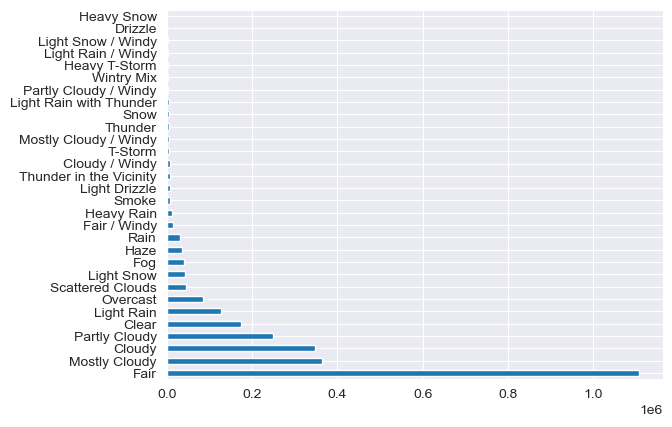

In [30]:
weather_by_accidents[:30].plot(kind='barh')

C:\Users\sutka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weather_Condition', ylabel='Density'>

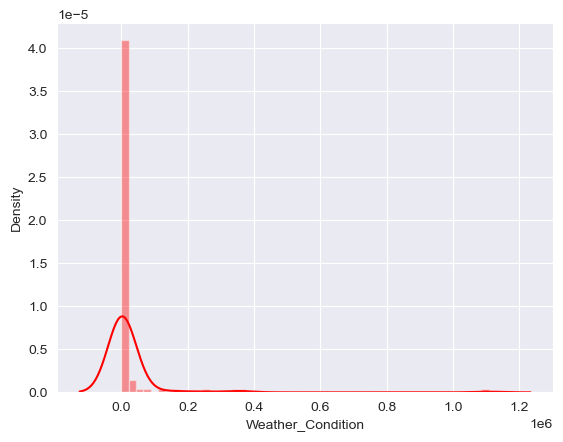

In [31]:
sns.distplot(weather_by_accidents , color ='red')

<AxesSubplot:ylabel='Weather_Condition'>

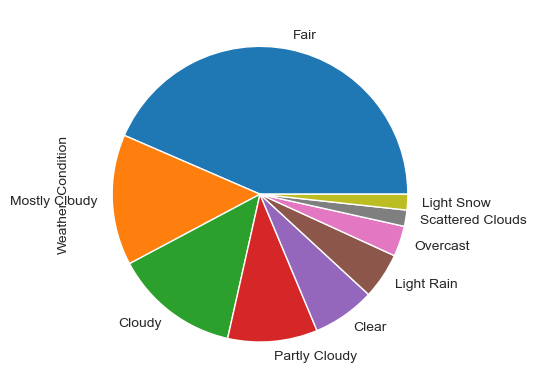

In [32]:
df.Weather_Condition.value_counts()[:9].plot(kind='pie')

<AxesSubplot:xlabel='Visibility(mi)', ylabel='Count'>

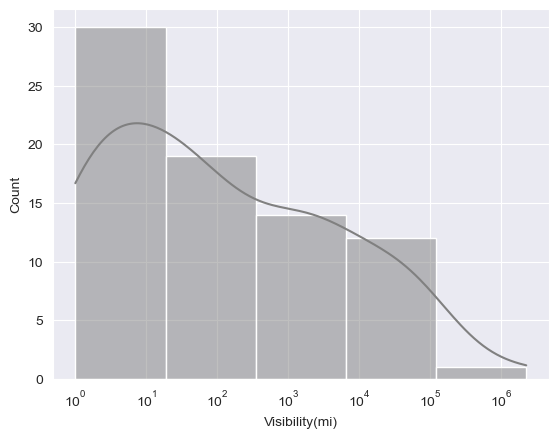

In [33]:
sns.histplot(df['Visibility(mi)'].value_counts(), bins= 5, kde=True, log_scale=True, color='grey')

### Visiblity

C:\Users\sutka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature(F)'>

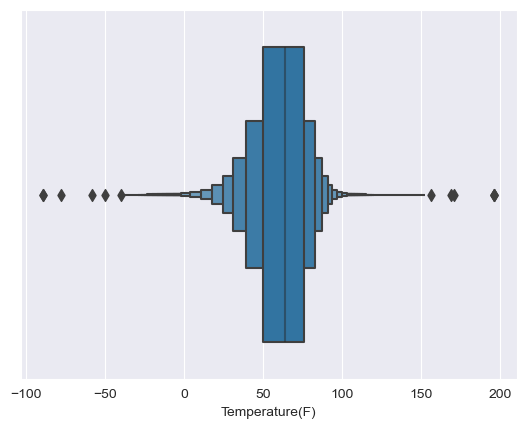

In [34]:
df['Temperature(F)'].value_counts()
sns.boxenplot(df['Temperature(F)'])

### Time Analysis

In [35]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [36]:
df.Start_Time= pd.to_datetime(df.Start_Time)

C:\Users\sutka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

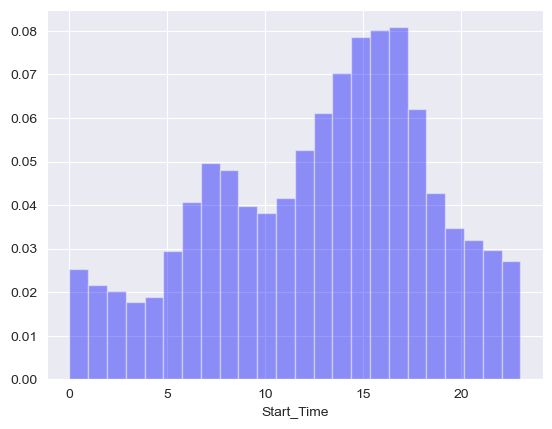

In [37]:
hour_of_day=df.Start_Time.dt.hour
sns.distplot(hour_of_day, bins=24,norm_hist=True, kde= False,color='blue')
## Figure how to show percentages in the Y axis

Most of the accidents are happenig around 3PM-5PM  due to people comming back to the Home due to tierdness

<AxesSubplot:xlabel='Start_Time'>

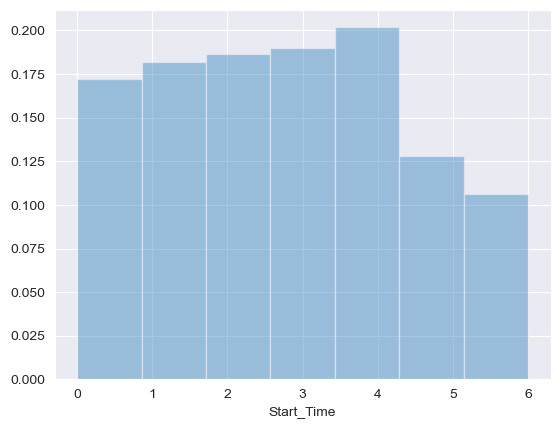

In [38]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7,norm_hist=True, kde= False)

<AxesSubplot:xlabel='Start_Time'>

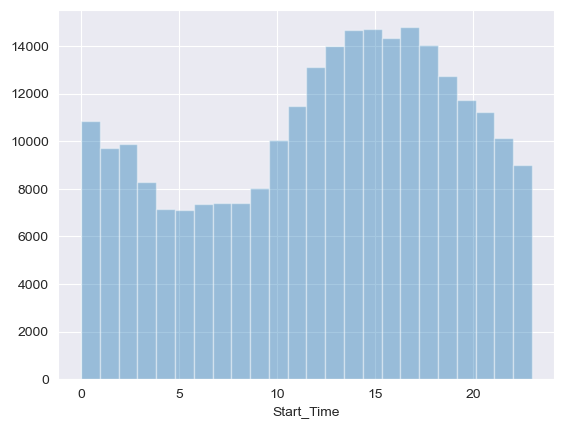

In [39]:
sunday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek== 6]   ## data for day of weekends 
sns.distplot(sunday_start_time.dt.hour, bins=24 ,norm_hist= False, kde= False)

<AxesSubplot:xlabel='Start_Time'>

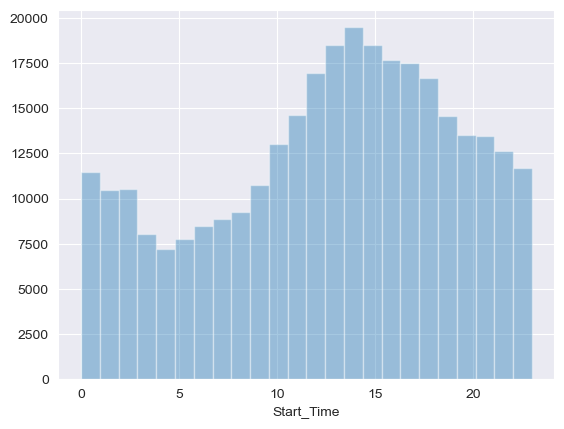

In [40]:
saturday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek== 5]   ## data for day of Monday 
sns.distplot(saturday_start_time.dt.hour, bins=24 ,norm_hist= False, kde= False)

<AxesSubplot:xlabel='Start_Time'>

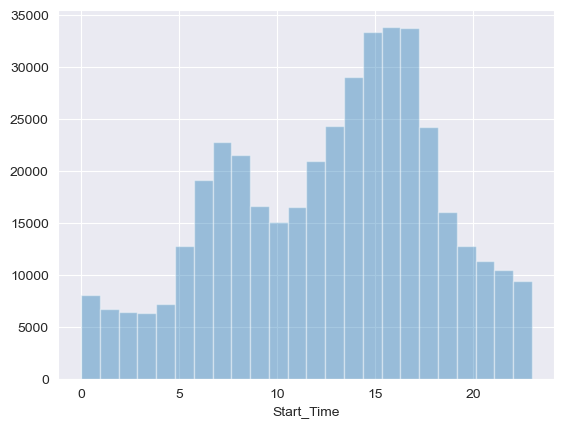

In [41]:
monday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek== 0]   ## data for day of Monday 
sns.distplot(monday_start_time.dt.hour, bins=24 ,norm_hist= False, kde= False)

 - on sundays peak occurs between 10 AM  and 9PM   and trend is same as for saturday also 
 - where on  mondays the data says diffrents accident occurs between 2 PM to 7 PM

<AxesSubplot:xlabel='Start_Time'>

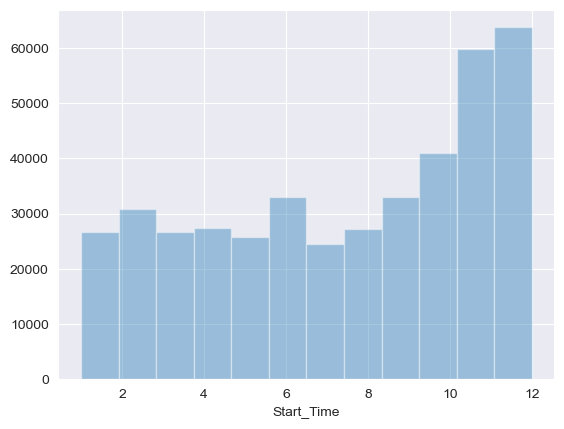

In [42]:
sns.distplot(monday_start_time.dt.month, bins=12 ,norm_hist= False, kde= False)

<AxesSubplot:xlabel='Start_Time'>

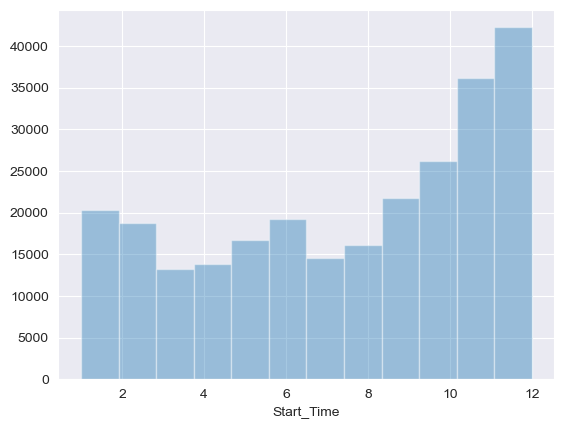

In [43]:
sns.distplot(sunday_start_time.dt.month, bins=12 ,norm_hist= False, kde= False)

- It says wheather on weekdays or weeks the accidents is highers at the end of the years most frequently

<AxesSubplot:xlabel='Start_Time'>

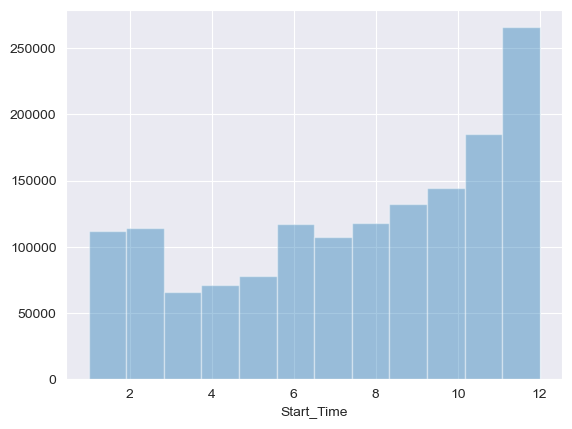

In [44]:
df_2018=df[df.Start_Time.dt.year==2021]
sns.distplot(df_2018.Start_Time.dt.month, bins=12 ,norm_hist= False, kde= False)

- In diffrent years the trend is changing every year
- data collection is not done properly for the 2016
- in 2021 leass aciidents happen due to COVID in starting Months

<AxesSubplot:ylabel='Start_Time'>

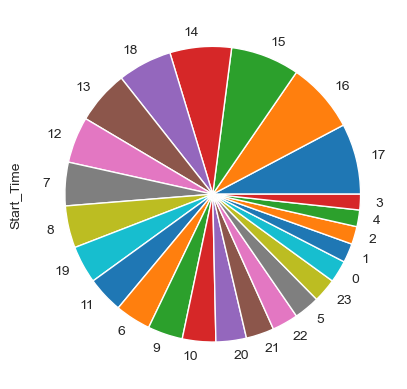

In [45]:
hour_of_day.value_counts().plot(kind='pie')

## Start Latitude and Longitude

In [46]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [47]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

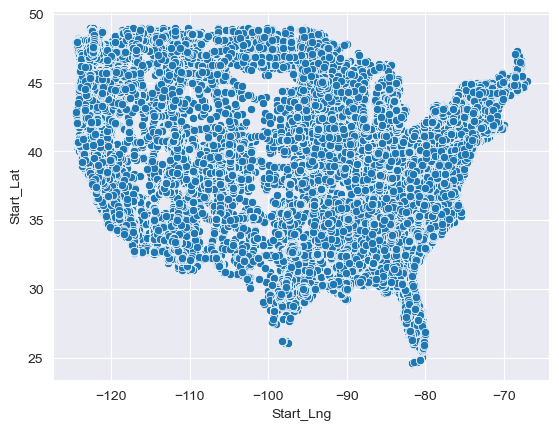

In [48]:
sns.scatterplot(x=df.Start_Lng , y = df.Start_Lat)   ### Map Of USA

In [49]:
sample_df= df.sample(int(0.1 * len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

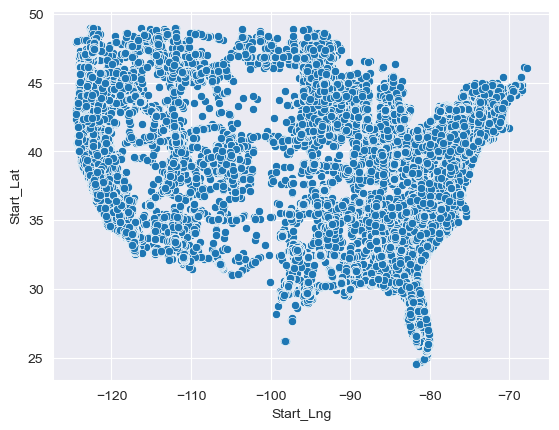

In [50]:
sns.scatterplot(x=sample_df.Start_Lng , y = sample_df.Start_Lat) 

### Reasons Of Accidents

In [51]:
fig = make_subplots(rows=1, cols=7, subplot_titles=('Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout'))

In [52]:
cnames = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout']
L = len(df)
for k, name in enumerate(cnames):
    n_true = df[name].sum()
    fig.add_trace(go.Bar(x=['True', 'False'], y=[n_true, L-n_true], name=name ), 1,k+1)
fig.update_layout(barmode='relative',  bargap=0.05, width=1000, height=500)

In [53]:
fig = make_subplots(rows=1, cols=6, subplot_titles=('Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal' ,'Amenity', 'Turning_Loop'))

In [54]:
cnames = ['Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal' ,'Amenity', 'Turning_Loop' ]
L = len(df)
for k, name in enumerate(cnames):
    n_true = df[name].sum()
    fig.add_trace(go.Bar(x=['True', 'False'], y=[n_true, L-n_true], name=name ), 1,k+1)
fig.update_layout(barmode='relative',  bargap=0.05, width=1000, height=500)

## Summary Conclusion

- Insights(City Column)
 -  Less that 4.5% cities have more accidents
 -  No Data For Newyork
 -  over 1100 cities reported only one accident(need to investigate)
 -  decreases exponentially
- Insight (Strat Time)
  - Most of the accidents are happenig around 3PM-5PM  due to people comming back to the Home due to tierdness
  - Next Highest percentage is 5 AM to 7AM
  - Evenely Distubuted in the weekdays but not on weekends
- Insight(Wheather)
  - The most frequently used word is “Fair”, followed by “Clear” and “Mostly Cloudy”. Now, the question arises that how did most of the recorded accidents occur under such weather conditions?
  - So, a chunk of the accidents happens to be in areas experiencing temperatures in the range of (50–60) degrees Fahrenheit. Most accidents occur in colder weather or regions.
  - The majority of accidents happened when the visibility was between 1 to 10 miles.On the surface of things, visibility is not a strong enough reason for the accidents.
- Insight(other Sub reason from the column)
 - Traffic Signal , Crossing and juction are the major reasons for the accidents so . The rason can be drawn from that Traffic management is not good in the USA which is leading to many accidents 
 - and also a question that a their may be some anamoly in the data such that Turning loop has no accidents , Bump is also not a Reason  may be their is missing data or data is counterfitted.
 

## Adios
## Enjoy Data Analysis !!!!